## Model Selection,Training and Evaluation.

In [3]:
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
    make_scorer


)
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/labeled/labeled_agric_survey_data_cleaned.csv")

In [5]:
df.head()

,elevation,latitude,longitude,location,slope,rainfall,min_temperature_c,max_temperature_c,ave_temps,soil_fertility,soil_type,ph,pollution_level,crop_type,standard_yield
0,786.05580,-7.389911,-7.556202,0,14.795113,1125.2,-3.1,33.1,15.00,0.62,3,6.169393,8.526684e-02,1,0.577964
1,674.33410,-7.736849,-1.051539,4,11.374611,1450.7,-3.9,30.6,13.35,0.64,5,5.676648,3.996838e-01,1,0.486302
2,826.53390,-9.926616,0.115156,4,11.339692,2208.9,-1.8,28.4,13.30,0.69,5,5.331993,3.580286e-01,6,0.649647
3,574.94617,-2.420131,-6.592215,3,7.109855,328.8,-5.8,32.2,13.20,0.54,0,5.328150,2.866871e-01,1,0.532348
4,331.35538,-13.409517,-6.722849,2,5.907423,1586.0,-6.8,31.8,12.50,0.63,4,7.061317,4.315457e-07,0,0.342871


### Linear Regression

In [6]:
def split_and_prepare_data(
    df: DataFrame, target_column: str, test_size: float = 0.3, random_state: int = 1
):
    """
    Splits the dataset into training and testing sets, separates the target column,
    and resets the index.

    Args:
        df: The input DataFrame.
        target_column (str): The name of the target column.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: X_train (features for training).
        pd.DataFrame: X_test (features for testing).
        np.ndarray: y_train (target values for training).
        np.ndarray: y_test (target values for testing).
    """
    if not isinstance(df, pd.DataFrame):
        raise TypeError("Input data must be a pandas DataFrame.")

    if target_column not in df.columns:
        raise ValueError(
            f"The target column '{target_column}' is not in the DataFrame."
        )

    # Split the dataset into training and testing sets
    X_train, X_test = train_test_split(
        df, test_size=test_size, random_state=random_state
    )

    # Reset the index for both splits
    X_train = X_train.reset_index(drop=True)
    X_test = X_test.reset_index(drop=True)

    # Extract target values
    y_train = X_train[target_column].values
    y_test = X_test[target_column].values

    # Remove the target column from features
    X_train = X_train.drop(columns=[target_column])
    X_test = X_test.drop(columns=[target_column])

    return X_train, X_test, y_train, y_test

In [7]:
X_train, X_test, y_train, y_test = split_and_prepare_data(
    df, target_column="standard_yield", test_size=0.3, random_state=1
)

In [8]:
def train_and_evaluate_lr(X_train, X_test, y_train, y_test):
    """
    Train a Linear Regression model and evaluate its performance using the test data.

    Args:
        X_train (pd.DataFrame): The features for training.
        X_test (pd.DataFrame): The features for testing.
        y_train (np.ndarray): The target values for training.
        y_test (np.ndarray): The target values for testing.

    Returns:
        LinearRegression: The trained Linear Regression model.
    """
    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print("\n--- Linear Regression Model Evaluation ---")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R² Score: {r2:.2f}")

    return model

In [9]:
train_and_evaluate_lr(X_train, X_test, y_train, y_test)


--- Linear Regression Model Evaluation ---
Mean Squared Error (MSE): 0.01
Mean Absolute Error (MAE): 0.07
R² Score: 0.28


LinearRegression()

### Decision Tree Regressor

In [10]:
def evaluate_model_dt(X_train, X_test, y_train, y_test):
    """
    Train a Decision Tree Regressor and evaluate its performance using the test data.

    Args:
        X_train: pd.DataFrame: The features for training.
        X_test: pd.DataFrame: The features for testing.
        y_train: np.ndarray: The target values for training.
        y_test: np.ndarray: The target values for testing.

    Returns:
        DecisionTreeRegressor: The trained Decision Tree Regressor model.
    """
    # Train Decision Tree model
    model = DecisionTreeRegressor(max_depth=20, min_samples_split=10)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate regression metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    #rmse = root_mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    # Print metrics
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    print(f"MAPE scores: {mape:.2f}")

    # Plot predicted vs actual values
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Actual vs Predicted Values")
    plt.show()

    return model

Mean Absolute Error (MAE): 0.03
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.04
R² Score: 0.87
MAPE scores: 0.05


/Users/Aaron/cropchain/crops/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


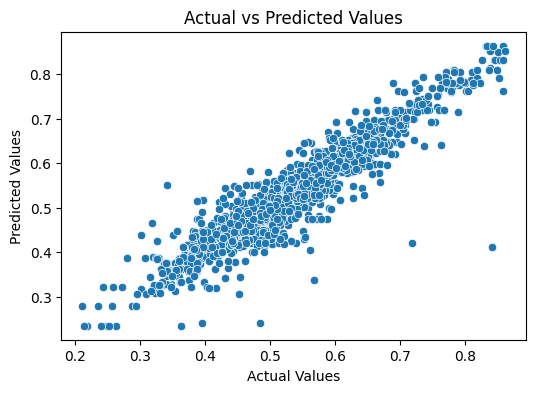

DecisionTreeRegressor(max_depth=20, min_samples_split=10)

In [11]:
evaluate_model_dt(X_train, X_test, y_train, y_test)

### Hyperparameter tuning on  `DecisionTreeRegressor` model

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {
    "max_features": ["sqrt", "log2", None],
    "max_depth": [None, 10, 20, 30], 
    "min_samples_split": [2, 5, 10], 
}

# Initialize the DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=1)

# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring="r2",  
    cv=5,  
    n_jobs=-1,
    verbose=2,  
    error_score="raise", 
)

# Perform the grid search
print("Starting grid search...")
grid_search.fit(X_train, y_train)
print("Grid search completed.")

# Display the best parameters and corresponding score
print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test R2 Score:", test_score)

Starting grid search...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_split=10; total ti

### Hyperparameter tuning on `RandomForestRegressor` model

In [14]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


# Define parameter grid for GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=5, scoring="r2", n_jobs=-1, verbose=2
)
grid_search.fit(X_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.7s
[CV] END ma